In [61]:
import yfinance as yf
import statistics as stats
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, stdev, median
from scipy.stats import kurtosis
from datetime import date
from datetime import datetime

In [5]:
# Input the ticker to be analyzed, it's starting date ("YYY-MM-DD"), timeframe, and other settings
symbol = "SPY"                      # Equity or ETF ticker to pull from YahooFinance
startDate = "2003-01-01"            # Specify start date as a string "YYY-MM-DD"
endDate = date.today()              # Specify end date: date.today(), otherwise a string "YYY-MM'DD"
timeframe = "1d"                    # Specify timeframe: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

MAperiods = 50                      # Simple Moving Average

In [6]:
# Parse the start and end dates into a date object
startDate = datetime.strptime(startDate, '%Y-%m-%d').date()

if type(endDate) == str:
    endDate = datetime.strptime(endDate, '%Y-%m-%d').date()

In [7]:
# Get the data
tickerData = yf.download(symbol, interval = timeframe, period = "max", end = endDate)

[*********************100%***********************]  1 of 1 completed


In [8]:
# Calculate the Simple Moving Average (SMA)
tickerData['SMA'] = tickerData['Close'].rolling(MAperiods).mean()

In [9]:
# Filter out the NA rows and rows before the desired start date
tickerData = tickerData[tickerData.index >= pd.to_datetime(startDate)]
tickerData.dropna()

,Open,High,Low,Close,Adj Close,Volume,SMA
Date,,,,,,,
2003-01-02,88.849998,91.300003,88.540001,91.070000,62.859005,44516300,90.653400
2003-01-03,90.910004,91.379997,90.500000,91.349998,63.052292,32222600,90.690000
2003-01-06,91.239998,93.489998,91.169998,92.959999,64.163544,40984500,90.745200
2003-01-07,92.900002,93.370003,92.199997,92.730003,64.004799,38640400,90.832600
2003-01-08,92.199997,92.400002,91.050003,91.389999,63.079903,38702200,90.856400
...,...,...,...,...,...,...,...
2022-04-04,453.130005,456.910004,452.260010,456.799988,456.799988,59601000,440.527403
2022-04-05,455.220001,457.829987,449.820007,451.029999,451.029999,74214500,440.751203
2022-04-06,446.890015,448.929993,443.470001,446.519989,446.519989,106898000,440.992203


In [10]:
# Flag buy/sell signals (1 = Buy to Open, 2 = Sell to Close)
tickerData['Entry'] = 0
i = 0

while i <= tickerData.shape[0] - 1:
    if tickerData['Close'][i] > tickerData['SMA'][i]:
        tickerData['Entry'][i] = 1
        
        if i + 1 <= tickerData.shape[0] - 1:
            i = i + 1
        else:
            break
        
        while True:
            if tickerData['Close'][i] < tickerData['SMA'][i]:
                tickerData['Entry'][i] = 2
                break
            else:
                if i + 1 <= tickerData.shape[0] - 1:
                    i = i + 1
                else:
                    break
    if i + 1 <= tickerData.shape[0] - 1:
        i = i + 1
    else:
        break


/tmp/ipykernel_19435/2301272541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickerData['Entry'] = 0
/tmp/ipykernel_19435/2301272541.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickerData['Entry'][i] = 1
/tmp/ipykernel_19435/2301272541.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickerData['Entry'][i] = 2


In [11]:
# Calculate profits
i = 0
buyTemp = 0.0
sellTemp = 0.0
profitList = list()

while i <= tickerData.shape[0] - 1:
    if tickerData['Entry'][i] == 1:
        buyTemp = tickerData['Close'][i]
        
        if i + 1 <= tickerData.shape[0] - 1:
            i = i + 1
        else:
            break
        
        while True:
            if tickerData['Entry'][i] == 2:
                sellTemp = tickerData['Close'][i]
                profitList.append((sellTemp - buyTemp)*100/buyTemp)
                break
            else:
                if i + 1 <= tickerData.shape[0] - 1:
                    i = i + 1
                else:
                    break
    if i + 1 <= tickerData.shape[0] - 1:
        i = i + 1
    else:
        break


In [60]:
# Print results
print("\n", "SMA Crossing Test",
      "\n",
      "\n Sum:\t\t\t", round(sum(profitList), 4), "%",
      "\n UL P/L:\t\t", round((profitList[len(profitList) - 1] - profitList[0])*100 / profitList[0], 4), "%",
      "\n Mean:\t\t\t", round(mean(profitList), 4), "%",
      "\n StdDev:\t\t", round(stdev(profitList), 4), "%",
      "\n Median:\t\t", round(median(profitList), 4), "%",
      "\n Min:\t\t\t", round(min(profitList), 4), "%",
      "\n Max:\t\t\t", round(max(profitList), 4), "%",
      "\n Kurtosis:\t\t", round(kurtosis(profitList), 4), "%",
      "\n",
      "\n Win Freq:\t\t", round(len([x for x in profitList if x > 0])*100 / len(profitList), 4), "%",
      "\n Lose Freq:\t\t", round(len([x for x in profitList if x < 0])*100 / len(profitList), 4), "%",
      "\n Sample Size:\t\t", len(profitList))


 SMA Crossing Test 
 
 Sum:			 92.9245 % 
 UL P/L:		 146.8309 % 
 Mean:			 0.5403 % 
 StdDev:		 3.6866 % 
 Median:		 -0.5611 % 
 Min:			 -4.1717 % 
 Max:			 19.8045 % 
 Kurtosis:		 7.5281 % 
 
 Win Freq:		 28.4884 % 
 Lose Freq:		 71.5116 % 
 Sample Size:		 172


Text(0.5, 0, 'Return (%)')

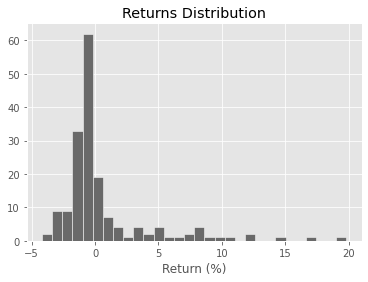

In [74]:
# Plot a histogram of returns
plt.style.use("ggplot")
plt.hist(profitList, bins = 30, edgecolor = 'white', color = 'dimgrey')
plt.title("Returns Distribution")
plt.xlabel("Return (%)")